In [1]:
#imports
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import seaborn as sns
%matplotlib inline

from __future__ import division

In [2]:
#Importer la frame

path = '../data/merge.csv'
df = pd.read_csv(path)

#Traiter la frame

del df['Unnamed: 0']

#Pour plus de simplicité dans le traitement des codes de département, on rassemble la Corse en un code (20)
df.dep = df.dep.apply(lambda x: x.replace('2A', '20').replace('2B', '20'))

#ligne aberrante à supprimer
df = df[df.l_EG != 198.67]

In [3]:
#on stocke les variables d'entrée dans X et de sortie dans y. yc indique le groupe ayant le score de législatives le + élevé
#p_win stocke le groupe politique ayant eu le score de présidentielle le plus élevé dans le département
X = df[df.columns[:-6]]
p_win = df[df.columns[-12:-6]].idxmax(axis=1)
y = df[df.columns[-6:]]
yc = y.idxmax(axis=1)

In [4]:
#supprimer 'presid_'
p_win = p_win.apply(lambda x: x.replace('presid_', ''))

In [5]:
#stocker dans une col
df['p_win'] = p_win

In [6]:
#on garde juste p_win et scores de législatives
d0 = df[['p_win'] + df.columns[-7:-1].tolist()]

In [7]:
#moyenne des scores de législatives de chaque groupe politique en fonction du groupe "vainqueur" des présidentielles.
scores_bp = d0.groupby('p_win').mean()

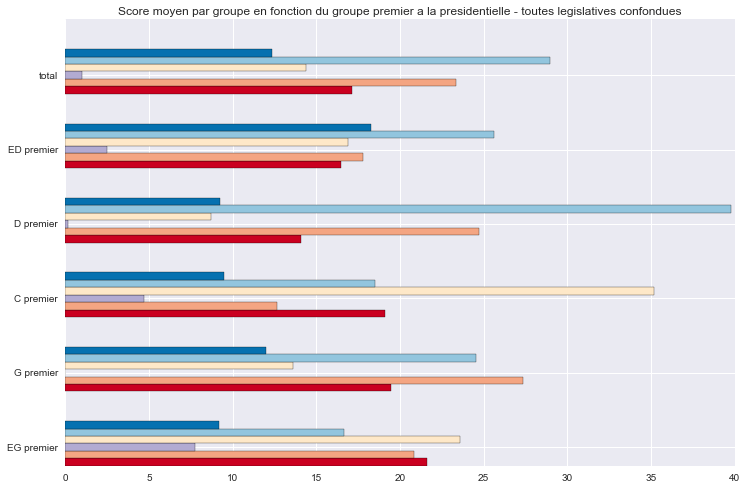

In [11]:
#pour faire apparaître la corrélation entre présidentielle et législative, on va dessiner un barplot des scores de 
#législatives moyens de chacun en fonction du groupe arrivé premier à la présidentielle

groups = ['EG', 'G', 'autre', 'C', 'D', 'ED']
sans_autre = groups[:2] + groups[-3:]
color = ['#ca0020', '#f4a582', '#b2abd2', '#fee8c8', '#92c5de', '#0571b0']

fig, ax = plt.subplots()

fig.set_size_inches(12,8)

ind = np.arange(6)
w = 1/10

for i in range(6):
    plt.barh(ind + i * w,
            scores_bp['l_%s' % groups[i]][sans_autre].values.tolist() + [d0['l_%s' % groups[i]].mean()],
            w,
            color=color[i])
    
plt.yticks(np.arange(6) + 1/4)
labels = [group + ' premier' for group in sans_autre] + ['total']
ax.set_yticklabels(labels)

plt.title('Score moyen par groupe en fonction du groupe premier a la presidentielle - toutes legislatives confondues')
plt.savefig('./plots/legis_selon_prez_allyears.png')

Une corrélation apparaît entre groupe arrivé premier à la présidentielle (du moins au premier tour) dans le département et scores des différents groupes aux législatives. Chaque groupe possède naturellement son plus haut score moyen de législatives dans les départements où il est arrivé premier à la présidentielle (du moins au premier tour).

On constate également qu'historiquement les groupes traditionnels (gauche et droite) ont fait les scores les plus élevés, la droite s'élevant carrément à un score moyen général de presque 30%.

Le graphe montre aussi de quelle façon des corrélations peu intuitives, et peut-être peu justes, seront établies par les différents modèles. Ainsi le centre a des chances d'effectuer un score supérieur à sa moyenne générale si l’extrême-gauche est arrivée première - et effectue même un score en moyenne supérieur à l’extrême-gauche. C’est la situation de 2017 qui s’exprime ici : l’extrême-gauche est arrivée première dans un grand nombre de département, et le centre a réalisé des scores de législatives forts cette année. Cependant il est peu probable qu’il y ait un lien de cause à effet entre la force de l'extrême-gauche à la présidentielle et celle du centre aux législatives.

In [12]:
#En excluant 2017

d1 = df[df.year != 2017][['p_win'] + df.columns[-7:-1].tolist()]
scores_bp1 = d1.groupby('p_win').mean()

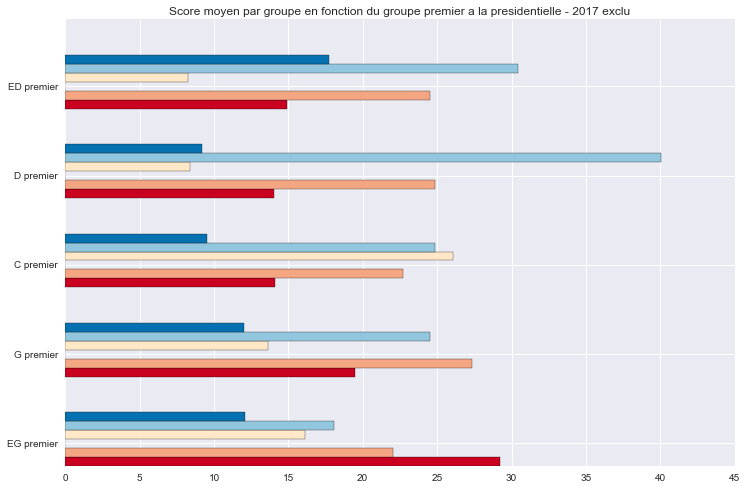

In [15]:
fig, ax = plt.subplots()

fig.set_size_inches(12,8)

ind = np.arange(5)
w = 1/10

for i in range(6):
    plt.barh(ind + i * w,
            scores_bp1['l_%s' % groups[i]][sans_autre],
            w,
            color=color[i])
    
plt.yticks(np.arange(5) + 1/4)
ax.set_yticklabels([group + ' premier' for group in sans_autre])

plt.title('Score moyen par groupe en fonction du groupe premier a la presidentielle - 2017 exclu')
plt.savefig('./plots/legis_selonprez_sans2017.png')

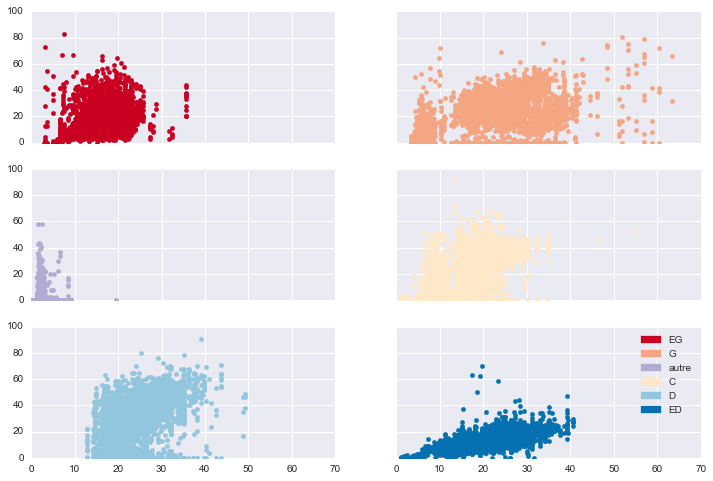

In [20]:
#Une autre façon de montrer cette corrélation :
#scatterplots pour chaque groupe du score de législatives en fonction du score de présidentielle

f, axarr = plt.subplots(3,2, sharex=True, sharey=True)
f.set_size_inches(12,8)

for i in range(6):
    if 0:#groups[i] == 'autre':
        pass
    else:
        plt.sca(axarr.flat[i])
        plt.scatter(df['presid_%s' % groups[i]], df['l_%s' % groups[i]], color=color[i])
        plt.xlim(0, 70)
        plt.ylim(0, 100)

patches = [mpatches.Patch(color=color[i], label=groups[i]) for i in range(6)]
plt.legend(handles=patches)
plt.savefig('./plots/legis_fct_p.png')

_Pour chaque camp, score aux législatives en fonction du score à la présidentielle_

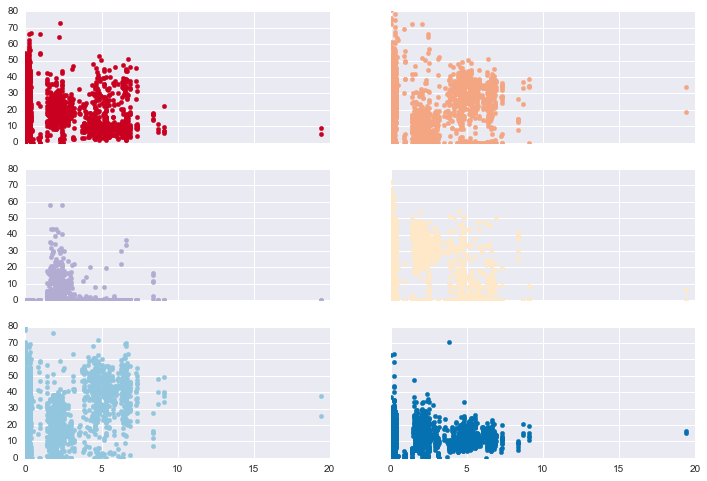

In [21]:
#Tout ça ne nous apprend pas grand chose ! Et si on s'amuse à faire un plot avec presid_autre ?

f, axarr = plt.subplots(3,2, sharex=True, sharey=True)
f.set_size_inches(12,8)

for i in range(6):
    if 0:#groups[i] == 'autre':
        pass
    else:
        plt.sca(axarr.flat[i])
        plt.scatter(df.presid_autre, df['l_%s' % groups[i]], color=color[i])
        plt.xlim(0, 20)
        plt.ylim(0, 80)

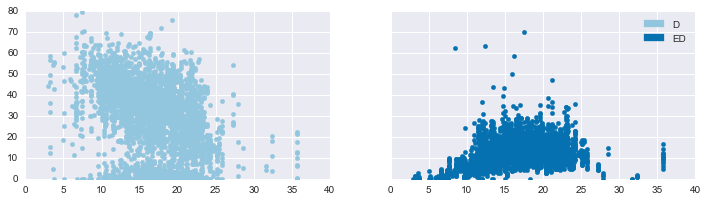

In [22]:
#Scores de la droite et de l'extrême-droite en fonction du score de présidentielle de l'extrême-gauche

f, axarr = plt.subplots(1,2, sharey=True)
f.set_size_inches(12,3)

for i in range(2):
    plt.sca(axarr.flat[i])
    plt.scatter(df.presid_EG, df['l_%s' % groups[i+4]], color=color[i+4])
    plt.xlim(0, 40)
    plt.ylim(0, 80)

patches = [mpatches.Patch(color=color[i], label=groups[i]) for i in range(4,6)]
plt.legend(handles=patches)

plt.savefig('./plots/xprezEG_ylegis.png')

_Scores de la droite et de l'extrême-droite en fonction du score de présidentielle de l'extrême-gauche_

On peut souligner l’opposition entre l’extrême-gauche et la droite traditionnelle. On voit au contraire que l’extrême-droite est légèrement plus forte dans les situations où l’extrême-gauche a obtenu un bon score. Ces deux corrélations assez classiques sont souvent expliquées par l’opposition entre des votes contestataires - les deux extrêmes qui si elles ne prônent pas les mêmes idées attirent toutes deux un électorat défavorisé - et un vote conservateur - la droite qui récolte les voix des classes aisées.

A l’inverse, une droite et une gauche traditionnelles fortes à la présidentielle signifient une extrême-droite légèrement plus faible. L’extrême-gauche est également affectée dans le cas d’une droite forte, dans un effet symétrique à l'effet qu'a l'extrême-gauche forte sur la droite.

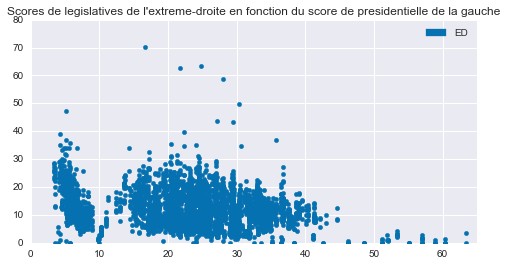

In [29]:
#l_ED en fonction de presid_G

plt.figure(figsize=(8,4))

plt.scatter(df.presid_G, df['l_%s' % groups[5]], color=color[5])
plt.xlim(0, 65)
plt.ylim(0, 80)
        
patches = [mpatches.Patch(color=color[5], label=groups[5])]
plt.legend(handles=patches)
plt.title('Scores de legislatives de l\'extreme-droite en fonction du score de presidentielle de la gauche')

plt.savefig('./plots/xprezG_ylegisED.png')

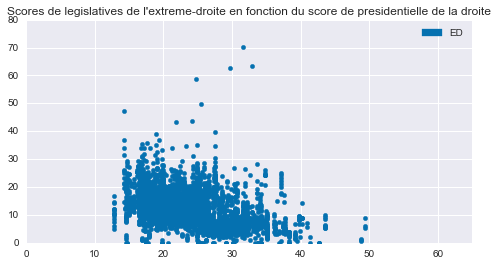

In [30]:
#l_ED en fonction de presid_D

plt.figure(figsize=(8,4))

plt.scatter(df.presid_D, df['l_%s' % groups[5]], color=color[5])
plt.xlim(0, 65)
plt.ylim(0, 80)
        
patches = [mpatches.Patch(color=color[5], label=groups[5])]
plt.legend(handles=patches)
plt.title('Scores de legislatives de l\'extreme-droite en fonction du score de presidentielle de la droite')

plt.savefig('./plots/xprezD_ylegisED.png')

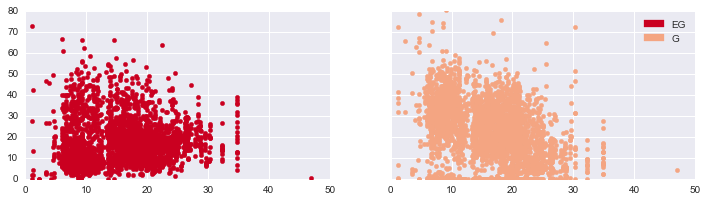

In [31]:
#Scores de législatives de l’extrême-gauche et de la gauche en fonction du score de présidentielle du centre

f, axarr = plt.subplots(1,2, sharey=True)
f.set_size_inches(12,3)

for i in [0,1]:
    if 0:#groups[i] == 'autre':
        pass
    else:
        plt.sca(axarr.flat[i])
        plt.scatter(df.presid_C, df['l_%s' % groups[i]], color=color[i])
        plt.xlim(0, 50)
        plt.ylim(0, 80)
        
patches = [mpatches.Patch(color=color[i], label=groups[i]) for i in [0,1]]
plt.legend(handles=patches)
        
plt.savefig('./plots/xprezC_ylegis.png')

_Scores de législatives de l’extrême-gauche et de la gauche en fonction du score de présidentielle du centre_

On trouve encore des corrélations qui reflètent les résultats de 2017 : lorsque le centre est fort, la gauche a des scores faibles aux législatives, et l’extrême-gauche également dans une moindre mesure.

L’existence de corrélations qui naissent de situations particulières comme celle-ci nous met en garde quant au risque d'overfit des modèles que nous mettrons en place. D'autant que nous disposons de peu de données d'entraînement... Seules 6 élections constituent notre jeu de données.